# Simulation 1: Simulate how the Gini importance changes with respect to the hyper-parameter of RF

In [1]:
from treeinterpreter.feature_importance import feature_importance
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Data generation

In [2]:
n = 200
X = np.zeros((n, 5))
np.random.seed(42)
X[:, 0] = np.random.normal(0, 1, (n, ))
X[:, 1] = np.random.choice([0, 1], (n, ))
X[:, 2] = np.random.choice(np.arange(4), (n, ))
X[:, 3] = np.random.choice(np.arange(10), (n, ))
X[:, 4] = np.random.choice(np.arange(20), (n, ))
y = np.zeros((n, ))
for i in range(n):
    prob = np.array([2 - X[i, 1], 1. + X[i, 1]]) / 3.
    y[i] = np.random.choice([0, 1], p=prob)
y_one_hot = np.vstack([1 - y, y]).T

### test set

In [3]:
XX = np.zeros((n * 10, 5))
XX[:, 0] = np.random.normal(0, 1, (n* 10, ))
XX[:, 1] = np.random.choice([0, 1], (n* 10, ))
XX[:, 2] = np.random.choice(np.arange(4), (n* 10, ))
XX[:, 3] = np.random.choice(np.arange(10), (n* 10, ))
XX[:, 4] = np.random.choice(np.arange(20), (n* 10, ))
yy = np.zeros((n* 10, ))
for i in range(n* 10):
    prob = np.array([2 - XX[i, 1], 1. + XX[i, 1]]) / 3.
    yy[i] = np.random.choice([0, 1], p=prob)

<hr />
### See how Gini importance changes w.r.t. node size

In [4]:
node_size = np.arange(1, 50, 2)
feature_imps = np.zeros((5, len(node_size)))
accs = np.zeros((len(node_size),))
for i, size in enumerate(node_size):
    rf = RandomForestClassifier(n_estimators=300, min_samples_leaf=size, random_state=10)
    rf.fit(X, y)
    feature_imps[:, i] = feature_importance(rf, X, y_one_hot, type='classic', normalized=False)[0]
    yy_pred = rf.predict(XX)
    accs[i] = accuracy_score(yy_pred, yy)

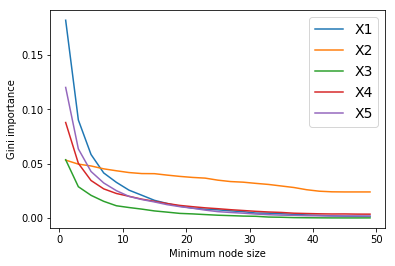

In [5]:
plt.plot(node_size, feature_imps.T)
plt.rcParams.update({'font.size': 14})
plt.xlabel('Minimum node size')
plt.ylabel('Gini importance')
plt.legend(['X1', 'X2', 'X3', 'X4', 'X5'])

In [7]:
node_size

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])

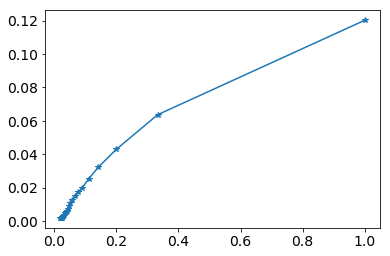

In [15]:
plt.plot( (1. * node_size) ** -1, feature_imps.T[:, 4], '-*')

### Obs: As the min node size increases, the Gini importance bias decreases.

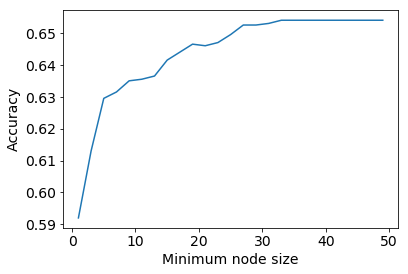

In [25]:
plt.plot(node_size, accs)
plt.rcParams.update({'font.size': 14})
plt.xlabel('Minimum node size')
plt.ylabel('Accuracy')
plt.show()

### Obs: RF prediction got better as minimum node size increases.

<hr />
### See how Gini importance changes w.r.t. depth

In [26]:
depth = np.arange(1, 20, 1)
feature_imps = np.zeros((5, len(depth)))
accs = np.zeros((len(depth),))
for i, size in enumerate(depth):
    rf = RandomForestClassifier(n_estimators=300, max_depth=size, random_state=10)
    rf.fit(X, y)
    feature_imps[:, i] = feature_importance(rf, X, y_one_hot, type='classic', normalized=False)[0]
    yy_pred = rf.predict(XX)
    accs[i] = accuracy_score(yy_pred, yy)

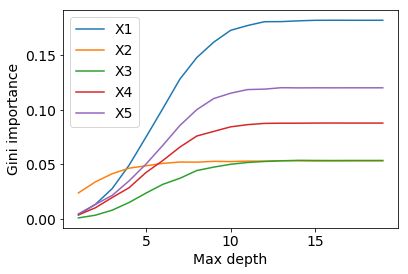

In [27]:
plt.plot(depth, feature_imps.T)
plt.rcParams.update({'font.size': 14})
plt.xlabel('Max depth')
plt.ylabel('Gini importance')
plt.legend(['X1', 'X2', 'X3', 'X4', 'X5'])

### Obs: As the max depth is higher, the bias of Gini importance increases.

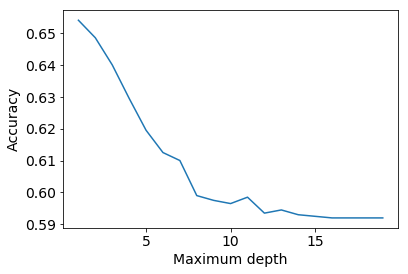

In [28]:
plt.plot(depth, accs)
plt.rcParams.update({'font.size': 14})
plt.xlabel('Maximum depth')
plt.ylabel('Accuracy')
plt.show()

### Obs: As max depth is higher, prediction got worse.